# Load Train and Test CSV

This method is only if you have obtained a cleaned version of the train and test dataset. 

The downside is that you wouldn't be able to highlight their start and end time. There is no flexibility.



**G Drive Method**

In [184]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [185]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

## Train Data - df

**G Drive Method**

In [186]:
# link_train = 'https://drive.google.com/file/d/1kYY_QI5Fc3umnMP5j5ICnD_nlZERgO62/view?usp=sharing' 

# fluff, id = link_train.split('/d/')
# id2, fluff2 = id.split('/view')
# print (id2) # Verify 

# fileDownloaded = drive.CreateFile({'id':f"{id2}"})

# name = "BX"
# fileDownloaded.GetContentFile(f"{name}.csv")

# import pandas as pd
# df = pd.read_csv(f"{name}.csv")

# df.head()



**Local Upload Method**

In [187]:
# from google.colab import files
# uploaded = files.upload()


In [188]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
# name = "BX"

# df.head()


In [189]:
# print(f"No. of data points in {name} train dataset: {len(df)}")

## Test Data - df2


**G Drive Method**

In [190]:
# link_test = 'https://drive.google.com/file/d/1am2HmNbe1Dif6vFlTNfJEUAEjZEE3WFA/view?usp=sharing' 

# fluff, id = link_test.split('/d/')
# id2, fluff2 = id.split('/view')
# print (id2) # Verify 

# fileDownloaded = drive.CreateFile({'id':f"{id2}"})

# name = "BX"
# fileDownloaded.GetContentFile(f"{name}.csv")

# import pandas as pd
# df2 = pd.read_csv(f"{name}.csv")

# df2.tail()


**Local Upload Method**

In [191]:
# from google.colab import files
# uploaded = files.upload()


In [192]:
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
# name = "BX"

# df2.head()


In [193]:
# print(f"No. of data points in {name} test dataset: {len(df2)}")

# Jupyter Notebook - VM

In [194]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);


<IPython.core.display.Javascript object>

## Correlation Heatmap

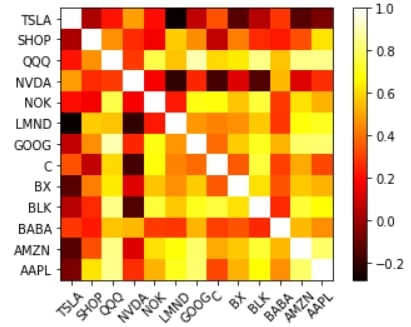

In [195]:
dir = r"C:\Users\banila\RRL-Stock-Trading\Stock Tickers\Final Data\15 min" # path
name = 'GOOG' # ticker name
path = f'{dir}\{name}_15min*.csv' # 15min, 30min, 1hr

import glob
files = glob.glob(path)
for f in files:
  print(f)

C:\Users\banila\RRL-Stock-Trading\Stock Tickers\Final Data\15 min\GOOG_15min.csv


In [196]:
### Dataframe df
import pandas as pd
df = pd.DataFrame()
for f in files:
    df = pd.read_csv(f)

print(f"No. of data points in {name} test dataset: {len(df)}")

No. of data points in GOOG test dataset: 29715


In [197]:
df.head(10)

,time,high,volume
0,2017-01-03 09:30:00,784.77,195255.0
1,2017-01-03 09:45:00,785.56,164685.0
2,2017-01-03 10:00:00,789.63,129069.0
3,2017-01-03 10:15:00,788.50,71493.0
4,2017-01-03 10:30:00,787.74,48830.0
5,2017-01-03 10:45:00,787.16,44261.0
6,2017-01-03 11:00:00,785.41,42437.0
7,2017-01-03 11:15:00,785.08,38491.0
8,2017-01-03 11:30:00,786.54,67278.0
9,2017-01-03 11:45:00,785.68,30588.0


In [198]:
df.tail(10)

,time,high,volume
29705,2021-05-24 13:45:00,2409.850,27940.0
29706,2021-05-24 14:00:00,2411.450,30687.0
29707,2021-05-24 14:15:00,2414.450,22726.0
29708,2021-05-24 14:30:00,2416.120,26010.0
29709,2021-05-24 14:45:00,2417.160,23211.0
29710,2021-05-24 15:00:00,2418.500,42901.0
29711,2021-05-24 15:15:00,2412.765,31287.0
29712,2021-05-24 15:30:00,2409.550,45765.0
29713,2021-05-24 15:45:00,2414.290,110525.0
29714,2021-05-24 16:00:00,2407.840,116411.0


In [199]:
df.loc[df['time'] == "2021-01-04 09:30:00"]
b = int(df.loc[df['time'] == "2021-01-04 09:30:00"].index.values)
a = b-1 # Train Data Length
c = len(df) # Total Length
b = c-a  # Test Data Length

print(f"Length of Train Data: {a} \nLength of Test Data: {b} \nLength of Total Data: {c} ")


Length of Train Data: 27068 
Length of Test Data: 2647 
Length of Total Data: 29715 


# List of Stocks

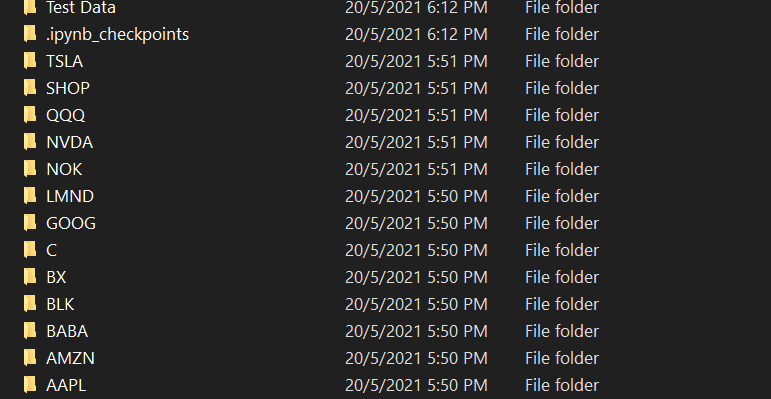

# Concat Train and Test Data 
**Easier for us to normalize**

In [200]:
# frames = [df, df2]
# ticker = pd.concat(frames)
ticker = df.copy()

ticker.drop(['time'], axis=1, inplace=True)
ticker.head()

,high,volume
0,784.77,195255.0
1,785.56,164685.0
2,789.63,129069.0
3,788.50,71493.0
4,787.74,48830.0


In [201]:
# a = len(df) # Train Data Length
# b = len(df2) # Test Data Length
# c = a + b # Total Length

# print(f"Length of Train Data: {a} \nLength of Test Data: {b} \nLength of Total Data: {c} ")

# Creating Model

In [202]:
### IMPORT LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob



In [203]:
### SHARPE RATIO
def sharpe_ratio(rets): # mean returns over standard deviation of the returns
    return rets.mean() / rets.std()

In [204]:
### TRADER FUNCTION
# theta is our input parameters in this case the slope of our line
def positions(x, theta):
    M = len(theta) - 2
    T = len(x)
    Ft = np.zeros(T)
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t - 1]]])
        Ft[t] = np.tanh(np.dot(theta, xt))
    return Ft

In [205]:
### RETURNS
def returns(Ft, x, delta):
    T = len(x)
    rets = Ft[0:T - 1] * x[1:T] - delta * np.abs(Ft[1:T] - Ft[0:T - 1])
    return np.concatenate([[0], rets])

In [206]:
### GRADIENT ASCENT
def gradient(x, theta, delta):
    Ft = positions(x, theta)
    rets = returns(Ft, x, delta)
    T = len(x)
    M = len(theta) - 2
    
    A = np.mean(rets)
    B = np.mean(np.square(rets))
    S = A / np.sqrt(B - A ** 2)

    grad = np.zeros(M + 2)  # initialize gradient
    dFpdtheta = np.zeros(M + 2)  # for storing previous dFdtheta
    
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t-1]]])
        dRdF = -delta * np.sign(Ft[t] - Ft[t-1])
        dRdFp = x[t] + delta * np.sign(Ft[t] - Ft[t-1])
        dFdtheta = (1 - Ft[t] ** 2) * (xt + theta[-1] * dFpdtheta)
        dSdtheta = (dRdF * dFdtheta + dRdFp * dFpdtheta)
        grad = grad + dSdtheta
        dFpdtheta = dFdtheta

        
    return grad, S

In [207]:
### TRAIN MODEL
# ideal epoch size is around 210+ as it plateau off 
# using epoch = 300
def train(x, epochs=300, M=5, commission=0.0025, learning_rate = 0.1):
    theta = np.ones(M + 2)
    sharpes = np.zeros(epochs) # store sharpes over time
    for i in range(epochs):
        grad, sharpe = gradient(x, theta, commission)
        theta = theta + grad * learning_rate

        sharpes[i] = sharpe
    
    
    print("finished training")
    return theta, sharpes

In [208]:
### LOAD DATA FROM ABOVE
rets = ticker['high'].diff()[1:]
x = np.array(rets)
x = (x - np.mean(x)) / np.std(x) # normalize data


# Split Data

In [209]:


N = int(len(ticker)*(a/c)) # Train Length
P = int(len(ticker)*(b/c)) # Test Length

x_train = x[-(N+P):-P]
x_test = x[-P:]
print(len(x_train))
print(len(x_test))




27067
2647


# Execute Model

In [215]:
# Change parameters
epochs=300
M=30
commission=0.0025
learning_rate=0.001

In [216]:
import timeit
start_time = timeit.default_timer()
# Increase commission from 0.0025
# M is the look-back window
theta, sharpes = train(x_train, epochs=epochs, M=M, commission=commission, learning_rate=learning_rate) 

elapsed = timeit.default_timer() - start_time
elapsed_min = elapsed/60
print(f"Time taken to train model is {elapsed_min} min")

finished training
Time taken to train model is 3.1307350600000063 min


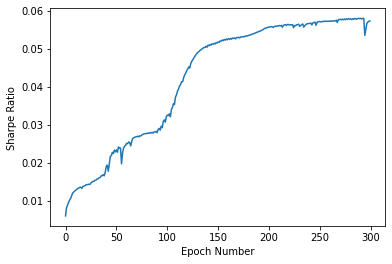

In [217]:
# Identify Optimal Epoch
plt.plot(sharpes)
plt.xlabel('Epoch Number')
plt.ylabel('Sharpe Ratio')
plt.savefig(f"{name}_Epoch_Plot_{epochs}.png")


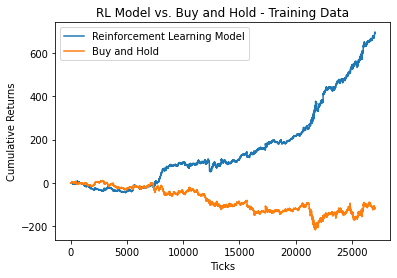

In [218]:
train_returns = returns(positions(x_train, theta), x_train, 0.025) 
plt.plot((train_returns).cumsum(), label="Reinforcement Learning Model")
plt.plot(x_train.cumsum(), label="Buy and Hold")
plt.xlabel('Ticks')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title("RL Model vs. Buy and Hold - Training Data")
plt.savefig(f"{name}_Train_Result_{epochs}_{M}_{learning_rate}.png")

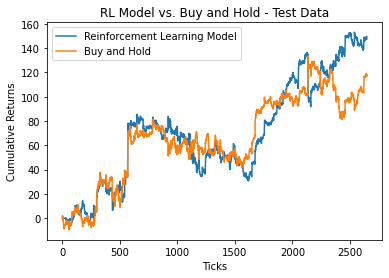

In [219]:
test_returns = returns(positions(x_test, theta), x_test, 0.025)
plt.plot((test_returns).cumsum(), label="Reinforcement Learning Model")
plt.plot(x_test.cumsum(), label="Buy and Hold")
plt.xlabel('Ticks')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title("RL Model vs. Buy and Hold - Test Data")
plt.savefig(f"{name}_Test_Result_{epochs}_{M}_{learning_rate}.png")